### Описание проекта
Задание: помочь маркетологам оптимизировать маркетинговые затраты.

У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
 - лог сервера с данными о посещениях сайта Яндекс.Афиши,
 - выгрузка всех заказов за этот период,
 - статистика рекламных расходов. \
Вы изучите:
 - как люди пользуются продуктом,
 - когда они начинают покупать,
 - сколько денег приносит каждый клиент
 - когда клиент окупается.


## Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

### Таблица visits (лог сервера с информацией о посещениях сайта):
 - Uid — уникальный идентификатор пользователя
 - Device — категория устройства пользователя
 - Start Ts — дата и время начала сессии
 - End Ts — дата и время окончания сессии
 - Source Id — идентификатор рекламного источника, из которого пришел пользователь

In [3]:
display(visits.sample(5))
visits.info()

,Device,End Ts,Source Id,Start Ts,Uid
16592,touch,2018-03-18 00:25:00,4,2018-03-18 00:20:00,6143985623996383164
113031,desktop,2018-01-07 13:32:00,9,2018-01-07 13:31:00,8261710685990035516
328073,desktop,2017-12-23 14:32:00,4,2017-12-23 14:31:00,8218647894092731011
156371,desktop,2018-03-17 20:07:00,4,2018-03-17 19:55:00,16329496408825399655
68397,desktop,2018-01-06 11:46:00,3,2018-01-06 11:43:00,6666527782308647300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


### Таблица orders (информация о заказах):
 - Uid — уникальный id пользователя, который сделал заказ
 - Buy Ts — дата и время заказа
 - Revenue — выручка Яндекс.Афиши с этого заказа

In [4]:
display(orders.sample(5))
orders.info()

,Buy Ts,Revenue,Uid
41656,2018-03-25 10:01:00,0.98,12540660671203391147
29564,2018-01-15 23:13:00,4.58,6243641061367992693
27770,2018-01-02 22:30:00,2.14,8857838941477864384
11600,2017-10-08 11:58:00,0.61,854415000651300857
42733,2018-03-29 16:20:00,3.05,2092255904976208256


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


### Таблица costs (информация о затратах на маркетинг):
 - source_id — идентификатор рекламного источника
 - dt — дата
 - costs — затраты на этот рекламный источник в этот день

In [5]:
display(costs.sample(5))
costs.info()

,source_id,dt,costs
866,3,2017-10-19,473.70
1616,5,2017-11-12,145.53
97,1,2017-09-06,61.10
288,1,2018-03-16,50.22
51,1,2017-07-22,20.98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Во всех трёх таблицах, столбцы с датами имеют некорректный тип данных, где-то имеют название с заглавной буквы и имеют пробелы. Исправим это.

In [6]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'] # переименуем столбцы
visits['start_ts'] = pd.to_datetime(visits['start_ts']) # сменим тип данных
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs['dt'] = pd.to_datetime(costs['dt'])


In [7]:
def show_info(df):
    return df.info()
show_info(orders)
show_info(visits)
show_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Шаг 2. Построим отчёты и посчитаем метрики

### Продукт

Чтобы посчитать дневное, недельное и месячное использование, выделим в отдельные столбцы год, месяц, неделю и день, а также полную дату.

In [8]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['day'] = visits['start_ts'].dt.day
visits['date'] = visits['start_ts'].dt.date
display(visits)

,device,end_ts,source_id,start_ts,uid,year,month,week,day,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,27,2017-12-27
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,29,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,25,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,3,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2,2017-11-02


In [9]:
dau_total = visits.groupby('date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день:', int(dau_total))
print('Количество уникальных пользователей в неделю:', int(wau_total))
print('Количество уникальных пользователей в месяц:', int(mau_total))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


Найдем количество сессий (юзеров и кол-во сессий на юзера) в день и их среднюю продолжительность.

In [10]:
ses_per_user = visits.groupby('date').agg({'uid': ['count','nunique']})
ses_per_user.columns = ['n_sessions', 'n_users']
ses_per_user['ses_per_user'] = ses_per_user['n_sessions'] / ses_per_user['n_users']
print(ses_per_user)

            n_sessions  n_users  ses_per_user
date                                         
2017-06-01         664      605      1.097521
2017-06-02         658      608      1.082237
2017-06-03         477      445      1.071910
2017-06-04         510      476      1.071429
2017-06-05         893      820      1.089024
...                ...      ...           ...
2018-05-27         672      620      1.083871
2018-05-28        1156     1039      1.112608
2018-05-29        1035      948      1.091772
2018-05-30        1410     1289      1.093871
2018-05-31        2256     1997      1.129695

[364 rows x 3 columns]


Средняя продолжительность сессий: 0    60
dtype: int64


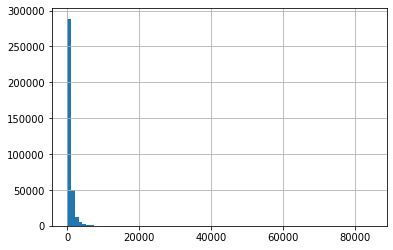

In [11]:
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds # продолжительность сессий
visits['duration_sec'].hist(bins=80)
asl=visits['duration_sec'].mode() # Average Session Length
print('Средняя продолжительность сессий:', asl)

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, поэтому рассчитали моду (значение в выборке, которое встречается чаще всего).

Посчитаем как часто люди возвращаются, в этом нам поможет показатель Retention Rate (коэффициент удержания).\
uid — идентификатор пользователя, совершившего действие в мобильном приложении; start_ts — время, когда действие было совершено.
Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность в приложении.
Эти данные запишем в объект Series first_date. Объединим его с исходным датафреймом visits.

In [12]:
sticky_mau = (dau_total / mau_total)*100 # *100 чтобы получить результат в процентах
sticky_wau = (dau_total / wau_total)*100 
# print('Sticky factor по отношению к недельной аудитории:', sticky_wau)
# print('Sticky factor по отношению к месячной аудитории:', sticky_mau)

In [13]:
first_date = visits.groupby(['uid'])['start_ts'].min()
first_date.name = 'first_date'
visits = visits.join(first_date, on='uid')

Следующим шагом выделим из столбцов first_date и start_ts месяцы. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'.

In [14]:
visits['first_m_date'] = visits['first_date'].astype('datetime64[M]')
visits['start_m_ts'] = visits['start_ts'].astype('datetime64[M]')
visits_grouped = visits.groupby('first_m_date').agg({'uid':'nunique'})
visits

,device,end_ts,source_id,start_ts,uid,year,month,week,day,date,duration_sec,first_date,first_m_date,start_m_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,27,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,29,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,25,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,3,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01


In [15]:
visits['activity_m'] = pd.to_datetime(visits['start_m_ts'], unit='m') - pd.to_timedelta(visits['start_m_ts'].dt.month, unit='m')
visits['first_activity_m'] = pd.to_datetime(visits['first_m_date'], unit='m') - pd.to_timedelta(visits['first_m_date'].dt.month, unit='m')
# для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты
visits['cohort_lifetime'] = visits['activity_m'] - visits['first_activity_m']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
# Сгруппируем данные по когорте и lifetime. 
# Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts = visits.groupby(['first_activity_m','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
# Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, 
# и на него разделить число пользователей в каждый следующий месяц.
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевом месяце:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_m','uid']]
# Переименуем столбец uid в cohort_users методом rename()
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count, on='first_activity_m')
# Retention Rate - разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
# Построим сводную таблицу и создадим тепловую карту:
retention_pivot = cohorts.pivot_table(index='first_activity_m',columns='cohort_lifetime',values='retention',aggfunc='sum')
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_m,,,,,,,,,,,,
2017-05-31 23:54:00,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-06-30 23:53:00,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-07-31 23:52:00,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-08-31 23:51:00,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-09-30 23:50:00,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-10-31 23:49:00,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-11-30 23:48:00,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 23:59:00,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31 23:58:00,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


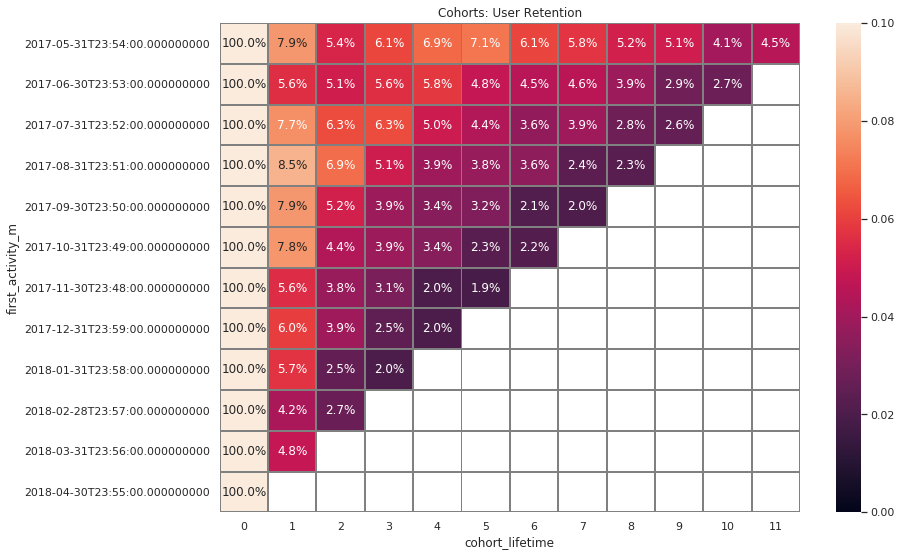

In [16]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1);

Retention Rate в первую неделю убывает по когортам с течением времени. Если для когорты пользователей, пришедших с 31 мая по 29 июня Retention Rate в первую неделю составляет 7,9%, то для пользователей, пришедших с 28 февраля по 30 марта — уже 4,2%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

### Продажи и маркетинг

Посчитаем сколько необходимо времени от момента первого знакомства до покупки.

In [17]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')
# создаем столбец с датой первого визита в таблице orders
first_visit_day = visits.groupby('uid')['start_ts'].min()
first_visit_day.name = 'first_visit_date'
orders = orders.join(first_visit_day, on='uid')
display(orders) 
# создаем столбец с кол-вом дней от первого визита до первой покупки
orders['to_order'] = (orders['first_order_date'] - orders['first_visit_date'])
# смотрим распределение до первой покупки
orders['to_order'].describe()

,buy_ts,revenue,uid,first_order_date,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00


count                      50415
mean     17 days 14:48:59.437072
std      46 days 11:10:48.112360
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:22:00
75%              4 days 07:51:00
max            363 days 07:04:00
Name: to_order, dtype: object

In [18]:
#orders['to_order_m'] = (orders['to_order'] / np.timedelta64(1, 's'))/60
#clean = orders.query('to_order_m > 0')
#clean['to_order_m'].describe()

Судя по минимальному и максимальному значению, выбросы все таки присутствуют. Поэтому будем смотреть не среднее и медиану, таким образом медианное время до покупки составляет 22 минуты.

Сколько раз покупают за период? Какой средний чек? Сколько денег приносят? (LTV). Для начала сформируем когорты по месяцам покупки.

In [19]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
display(orders.head(10))

,buy_ts,revenue,uid,first_order_date,first_visit_date,to_order,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,00:01:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,00:11:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,00:02:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,00:15:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,00:27:00,2017-06-01,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01 08:43:00,00:00:00,2017-06-01,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01 08:51:00,00:03:00,2017-06-01,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01 09:22:00,00:00:00,2017-06-01,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01 09:18:00,00:04:00,2017-06-01,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01 09:21:00,00:02:00,2017-06-01,2017-06-01


In [20]:
orders.pivot_table(index='first_order_month', # когорта пользователей first_order_month
    columns='order_month', # месяц совершения покупки order_month
    values='revenue',
    aggfunc='count')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0,NaN
2017-07-01,NaN,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08-01,NaN,NaN,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN
2017-09-01,NaN,NaN,NaN,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5052.0,270.0,202.0,179.0,86.0,105.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3783.0,224.0,159.0,64.0,78.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4095.0,222.0,83.0,70.0,NaN


In [21]:
orders.pivot_table(index='first_order_month',
    columns='order_month',
    values='revenue',
    aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093,NaN
2017-07-01,NaN,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,NaN,NaN,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN
2017-09-01,NaN,NaN,NaN,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN
2017-10-01,NaN,NaN,NaN,NaN,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687417,4.438482,6.454969,7.524844,2.711282,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.706266,4.576486,3.453735,3.867143,NaN


In [22]:
df1 = orders.pivot_table(index='uid', values='buy_ts', aggfunc='count')
print('Среднее количество покупок за период у всех пользователей:', df1['buy_ts'].mean())
df1 # Количество покупок на одного покупателя, за весь период

Среднее количество покупок за период у всех пользователей: 1.3803630588943954


,buy_ts
uid,
313578113262317,1
1575281904278712,2
2429014661409475,1
2464366381792757,1
2551852515556206,2
...,...
18445147675727495770,1
18445407535914413204,3
18445601152732270159,1


In [23]:
print('Средний чек покупки за весь период:', orders['revenue'].mean())

Средний чек покупки за весь период: 4.999646930477041


Что можно сказать по этим таблицам количества покупок и их среднему чеку:
После первого месяца количество покупок в когорте снижается.
В некоторых когортах число покупок периодически начинает расти. Например, в когорте 2017-06-01.\
Интересен резкий скачок среднего чека у когорты "2017-09-01", в декабре 2017го года.
___
Проведем общий расчет **LTV**, **CAC** и **ROMI**

In [24]:
costs['month'] = costs['dt'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()#месяц первой покупки каждого покупателя
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [25]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [26]:
orders = orders.drop(columns=['first_order_month', 'to_order'])
# Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = pd.merge(orders,first_orders, on='uid')
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts.head()) 

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


Строка таблицы cohorts показывает, какую выручку принесла когорта. Например, строка 0 сообщает, что покупатели, сделавшие свой первый заказ в июне 2017 года, в этом же месяце принесли суммарно 9557 рублей выручки.
С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [27]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58


До расчёта LTV осталось 2 шага. Во-первых, LTV считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. Во-вторых, LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [28]:
margin_rate = 1.0 # установим маржинальность
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head()) 

  first_order_month  n_buyers order_month  revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4


In [29]:
#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте
report['ltv'] = report['gp'] / report['n_buyers']
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2).cumsum(axis=1)
output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


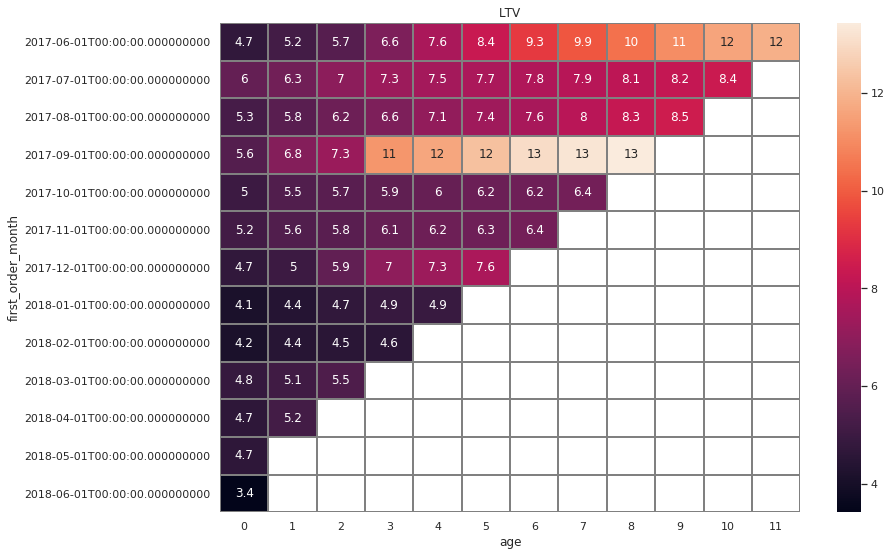

In [30]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray');

In [31]:
ltv_201706 = output.loc['2017-06-01'].sum() # Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам:
print(ltv_201706.round(2))

102.35


В среднем каждый покупатель из первой когорты принес по 102.35 рублей выручки за 12 месяцев «жизни».
Посчитаем CAC этой когорты. Поделим расходы за этот месяц на количество людей в когорте:

In [32]:
# отфильруем нужную когорту
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# посчитаем расходы за этот месяц
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.905091448344043
LTV = 102.35000000000001


Привлечение одного покупателя в среднем обошлось компании в 8.9 рублей. Валовая прибыль с каждого из них: 102.35 рублей. То есть вложения в привлечение покупателей окупились. \
Посчитаем остальные когорты и посмотрим, сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты. Посчитаем CAC каждой когорты. Сначала найдём **суммарные расходы за каждый месяц**, а затем поделим их на количество покупателей в каждой когорте:

In [33]:
# считаем расходы за месяц, тем самым ответим на вопрос сколько всего затратили по времени
display(costs)

monthly_costs = costs.groupby('month').agg({'costs':'sum'}) # по месяцам
display(monthly_costs)


monthly_costs2 = costs.pivot_table(index='source_id', values='costs', aggfunc='sum') # по источникам
display(monthly_costs2)
#monthly_costs = costs.groupby('month').sum() # неверное решение

print('Суммарные траты на маркетинг:', monthly_costs['costs'].sum().round(2))

# добавим данные о расходах в отчёт и посчитаем CAC:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head() 

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Суммарные траты на маркетинг: 329131.62


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091


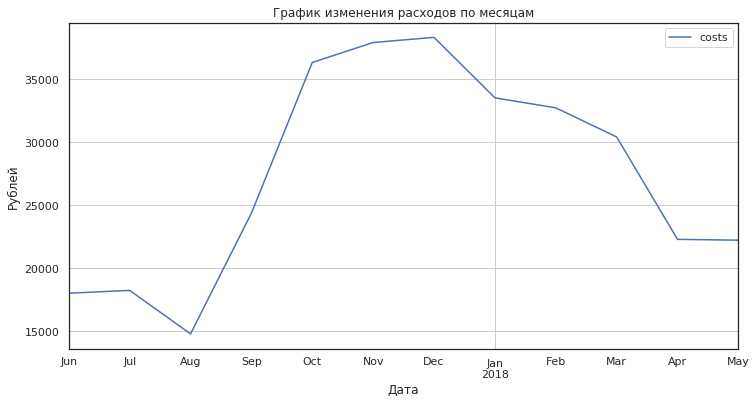

In [34]:
monthly_costs.plot(grid=True, figsize=(12,6))
plt.title('График изменения расходов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Рублей')
plt.show()

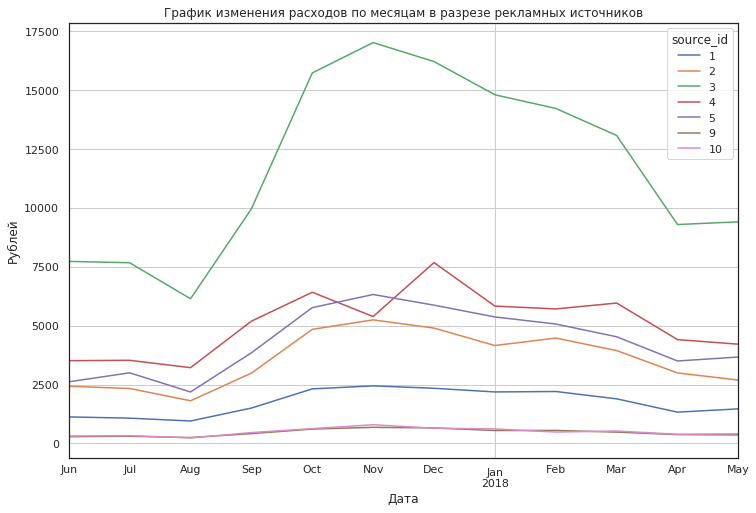

In [35]:
(costs
.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
.plot(figsize=(12,8),grid=True) )
plt.title('График изменения расходов по месяцам в разрезе рекламных источников')
plt.xlabel('Дата')
plt.ylabel('Рублей')
plt.show() # построим распределение изменения расходов по месяцам в разрезе рекламных источников

In [36]:
# рассчитаем ROMI: поделим LTV на CAC
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output1 = output.cumsum(axis=1).round(2) 
output1

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


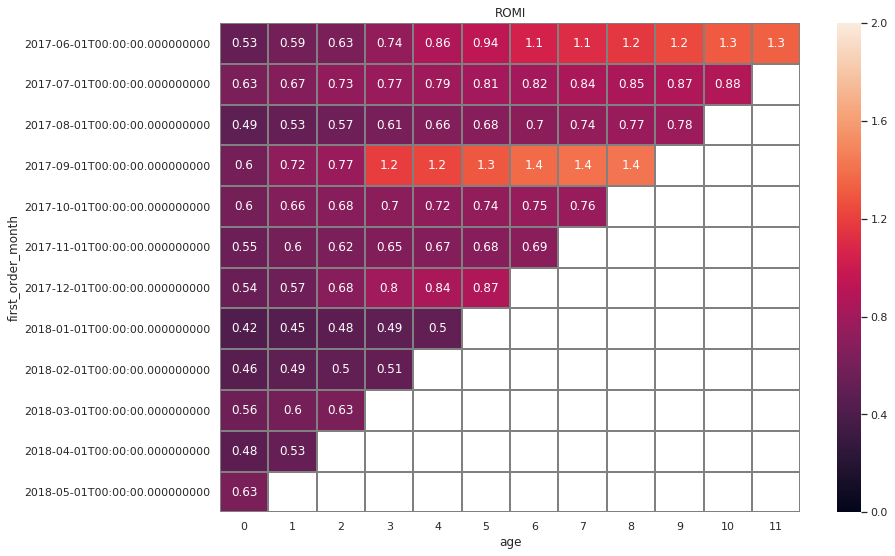

In [37]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output1, annot=True, linewidths=1, linecolor='gray', vmin=0, vmax=2);

На практике считают среднюю когорту — усредняют ROMI или LTV всех когорт за каждый месяц их жизни. Например, узнаем, как быстро в среднем когорты окупаются. Усредним значения каждой колонки и «сложим» таблицу в единую строку методом mean(axis=0): \
В среднем когорты окупаются к **9** месяцу.

In [38]:
output.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

In [39]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new
# (report_new
# .pivot_table(index='first_order_month', columns='source_id', values='romi')
# .plot(kind='bar', figsize=(18,10), rot=90, grid=True) )
# plt.title('График изменения ROMI по месяцам в разрезе рекламных источников')
# plt.xlabel('DATE')
# plt.ylabel('Рублей')
# plt.show() # построим распределение

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599,22289.38,9.793225,0.054282


___
Мы рассчитали общий LTV, CAC теперь необходимо сделать это в разрезе источников и устройств, для того, чтобы ответить на вопрос: "порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?". 

Для этого мы создадим профиль пользователя - датафрейм, в котором есть дата, источник и устройство первого посещения. Туда же можно записать стоимость привлечения отдельного пользователя.

In [40]:
costs = costs.rename(columns = {'dt':'acq_date'})  # acq(acquisition) - приобретение

users = (visits.sort_values(by = ['uid', 'start_ts']).groupby('uid')
               .agg({'start_ts':'first', 'source_id':'first', 'device':'first'})
               .rename(columns={'start_ts':'acq_ts'}))
users['acq_date'] = users['acq_ts'].dt.date
users['acq_month'] = users['acq_date'].astype('datetime64[M]')
users = (users.reset_index().set_index(['source_id', 'acq_date'])
                            .join(costs.set_index(['source_id', 'acq_date']), how='left'))
# добавим стоимость приобретения каждого пользователя
user_cost = (users.groupby(['source_id', 'acq_date']).agg({'device':'count', 'costs':'max'})
                  .rename(columns={'device':'users'}))
user_cost['acq_cost'] = (user_cost['costs'] / user_cost['users']) #.round(2) 
users = users.join(user_cost[['acq_cost']], how='left')
users = users.reset_index().set_index('uid')[['acq_ts', 'acq_date', 'acq_month', 'source_id', 'device', 'acq_cost']]
users

,acq_ts,acq_date,acq_month,source_id,device,acq_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.600000
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.600000
...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.177778
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.177778
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.177778


Когда мы делаем когортный анализ, мы строим ltv по первой дате. Профиль дает нам возможность вместо даты использовать другой первый признак - например, устройство или рекламный источник:

In [41]:
dimensions = ['device'] # сначала по устройствам

cohorts_n=(users.groupby(dimensions).agg({'source_id':'count', 'acq_cost':'sum'}) # строим когорты
              .rename(columns={'source_id':'cohort_size'}))
cohorts_n['cac_n'] = cohorts_n['acq_cost']/cohorts_n['cohort_size'] # CAC
display(cohorts_n)
ltv_n = orders.set_index('uid').join(users, how='left')[['acq_month', 'source_id', 'device', 'order_month', 'revenue']]
ltv_n['age_month'] = ((ltv_n['order_month'] - ltv_n['acq_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_n=ltv_n.groupby(dimensions + ['age_month']).agg({'revenue':'sum'})
ltv_n=pd.pivot_table(ltv_n, index=dimensions, columns = 'age_month', values='revenue', aggfunc='sum')

ltv_n = ltv_n.cumsum(axis=1)
ltv_n = cohorts_n[['cohort_size']].join(ltv_n)

ltv_n = ltv_n.div(ltv_n['cohort_size'], axis=0).drop(columns=['cohort_size']) #делим все ячейки на соотв когорту
romi_n = ltv_n.div(cohorts_n['cac_n'], axis=0) # ROMI
display(ltv_n)
display(romi_n)
ltv_desk= ltv_n.loc['desktop'].sum()
ltv_touch= ltv_n.loc['touch'].sum()

,cohort_size,acq_cost,cac_n
device,,,
desktop,160795,235065.750929,1.461897
touch,67374,94000.729071,1.395208


,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.498437,0.576893,0.632247,0.731786,0.773337,0.809009,0.834318,0.852420,0.866586,0.881649,0.891800,0.899024
touch,0.267476,0.320221,0.343036,0.360167,0.373531,0.386213,0.395359,0.407907,0.418136,0.427792,0.430823,0.433267


In [42]:
print('Desktop: САС = 1.46, LTV =', ltv_desk.round(2))
print('Touch: САС = 1.39, LTV =', ltv_touch.round(2))

Desktop: САС = 1.46, LTV = 13.52
Touch: САС = 1.39, LTV = 6.37


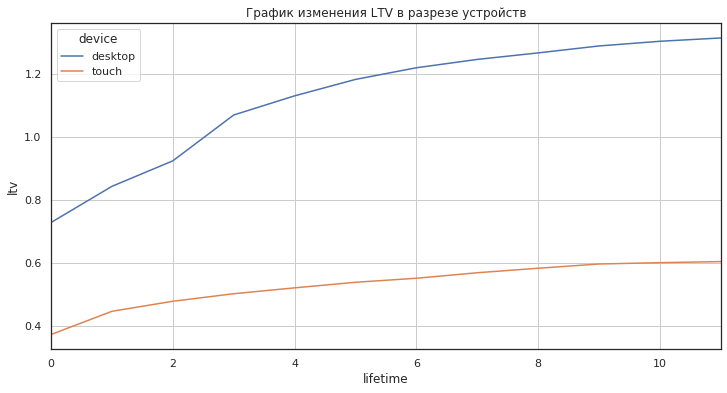

In [43]:
ltv_n.T.plot(grid=True, figsize=(12,6)) # Построим распределение ltv
plt.title('График изменения LTV в разрезе устройств')
plt.xlabel('lifetime')
plt.ylabel('ltv')
plt.show()

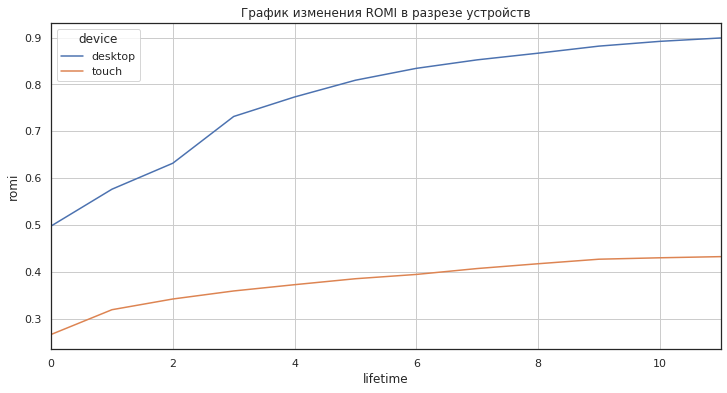

In [44]:
romi_n.T.plot(grid=True, figsize=(12,6)) # Построим распределение romi
plt.title('График изменения ROMI в разрезе устройств')
plt.xlabel('lifetime')
plt.ylabel('romi')
plt.show()

Привлечение одного покупателя Desktop в среднем обошлось компании в 1.46. Валовая прибыль с каждого из них: 14.98. То есть вложения в привлечение покупателей окупились. Аналогичная ситуация с Touch.

Построим схожее распределение в разрезе источников

In [45]:
dimensions2 = ['source_id']

cohorts_n2=(users.groupby(dimensions2).agg({'device':'count', 'acq_cost':'sum'})
              .rename(columns={'device':'cohort_size'}))
cohorts_n2['cac']= cohorts_n2['acq_cost']/cohorts_n2['cohort_size'] # получим САС
display(cohorts_n2)
ltv_n2 = orders.set_index('uid').join(users, how='left')[['acq_month', 'source_id', 'device', 'order_month', 'revenue']]
ltv_n2['age_month'] = ((ltv_n2['order_month'] - ltv_n2['acq_month']) / np.timedelta64(1,'M')).round().astype('int')

ltv_n2=ltv_n2.groupby(dimensions2 + ['age_month']).agg({'revenue':'sum'})
ltv_n2=pd.pivot_table(ltv_n2, index=dimensions2, columns = 'age_month', values='revenue', aggfunc='sum')

ltv_n2 = ltv_n2.cumsum(axis=1)
ltv_n2 = cohorts_n2[['cohort_size']].join(ltv_n2)

ltv_n2 = ltv_n2.div(ltv_n2['cohort_size'], axis=0).drop(columns=['cohort_size'])
display(ltv_n2)
romi_n2 = ltv_n2.div(cohorts_n2['cac'], axis=0) # получим ROMI
display(romi_n2)


,cohort_size,acq_cost,cac
source_id,,,
1,9469,20833.27,2.200155
2,17616,42806.04,2.429952
3,66116,141321.63,2.137480
4,72346,61073.60,0.844188
5,49237,51756.40,1.051169
6,2,0.00,0.000000
7,32,0.00,0.000000
9,6448,5454.42,0.845909
10,6903,5821.12,0.843274


,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.697297,0.822769,0.908954,1.040228,1.121444,1.174927,1.219778,1.325768,1.385900,1.427633,1.467167,1.492351
2,0.418291,0.559837,0.701083,0.852863,0.927469,0.985270,1.013786,1.032048,1.049610,1.071874,1.087187,1.096191
3,0.266843,0.308693,0.326205,0.342036,0.356107,0.365864,0.373452,0.377555,0.381188,0.383276,0.384664,0.385725
4,0.613237,0.686213,0.721014,0.755086,0.783961,0.819153,0.853220,0.864913,0.880473,0.902840,0.915853,0.928336
5,0.556115,0.622242,0.661176,0.871255,0.905200,0.946823,0.969087,0.986965,0.997461,1.012592,1.015202,1.016764
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.435346,0.551036,0.655912,0.749159,0.832906,0.874366,0.925163,0.961737,1.012340,1.042393,1.053069,1.055914
10,0.610616,0.662642,0.684509,0.697689,0.727260,0.741076,0.753372,0.757834,0.758569,0.761608,0.762951,0.764514


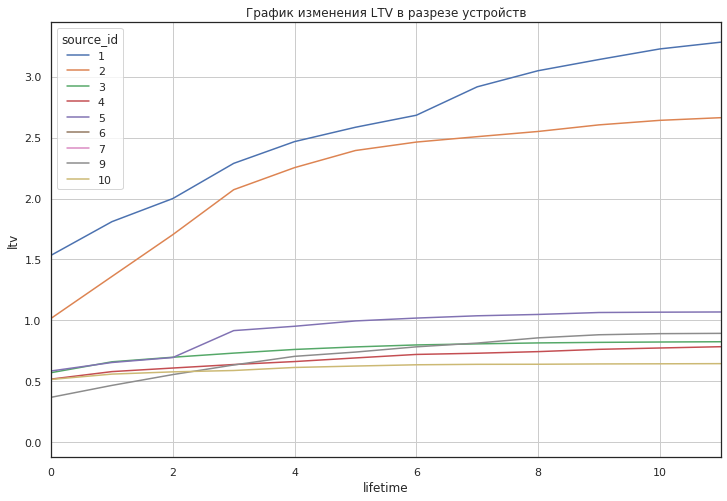

In [46]:
ltv_n2.T.plot(grid=True, figsize=(12,8)) # Построим распределение ltv
plt.title('График изменения LTV в разрезе устройств')
plt.xlabel('lifetime')
plt.ylabel('ltv')
plt.show()

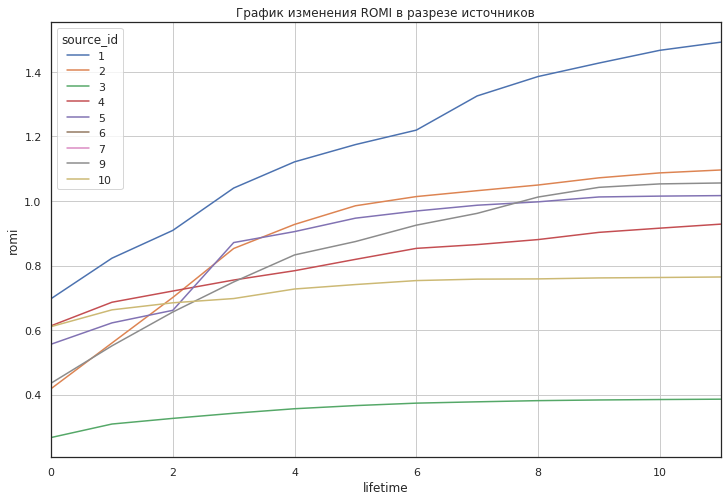

In [47]:
romi_n2.T.plot(grid=True, figsize=(12,8)) # Построим распределение romi
plt.title('График изменения ROMI в разрезе источников')
plt.xlabel('lifetime')
plt.ylabel('romi')
plt.show()

## Шаг 3.  Вывод

В среднем когорты окупаются к концу 8-9 месяца.
Почему когорты показывают хорошие результаты, а бизнес всё равно убыточен (329066 - 252057)? Возможно дело в том, что компания начала наращивать обороты не сразу. Расходы выросли, количество новых клиентов тоже, но на окупаемость требуется 7-9 месяцев, вот доходы и не успели «догнать» затраты. Кажется, в компании всё хорошо.

При примерно одинаковых затратах на привлечение клиентов, платформа **Desktop** приносит в два раза больше, нежели **Touch**, возможно пока не стоит вкладывать в маркетинг по этому направлению, так как клиентам неудобно пользоваться приложением на сенсорных устройствах.

Что касаемо идентификаторов рекламного источника, то по визуальному отображению **romi_n2** мы видим как хорошо отрабатывают источники 1, 2 и чуть хуже 5, 9. Поэтому можем посоветовать сфокусировать бюджет именно на этих источниках.
